Generating Women % Distribution chart...


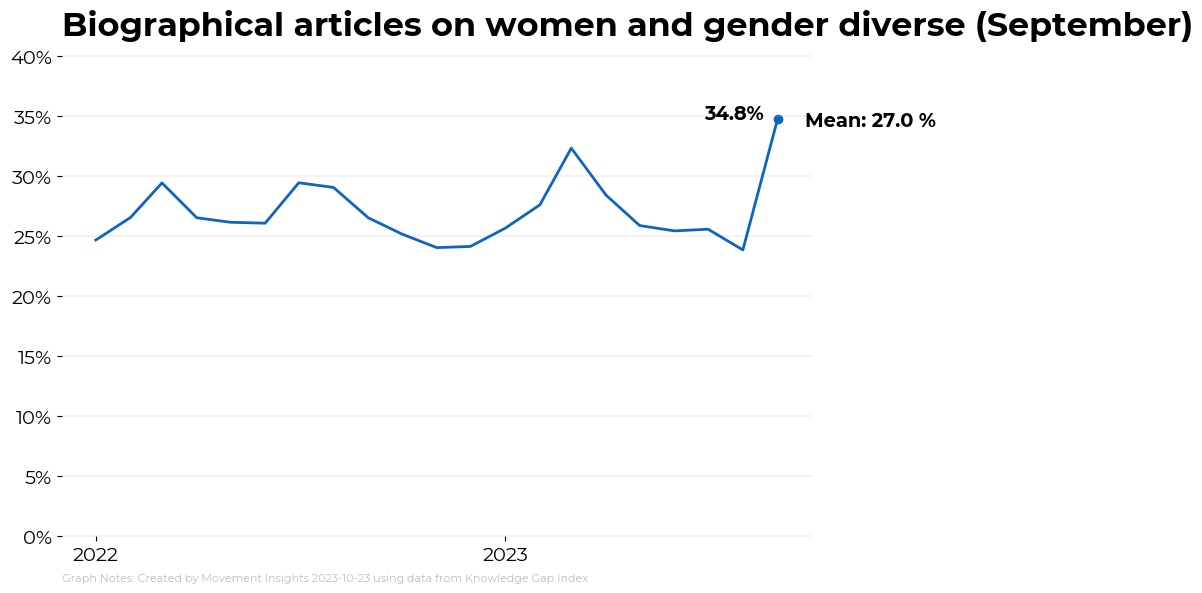

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date, datetime
import calendar
import warnings
%run wikicharts1.ipynb


def main():
    print("Generating Women % Distribution chart...")
    df = pd.read_csv("data/updated_gender.csv")
    #---PARAMETERS---
    save_file_name = "Women_Percentage_Distribution.png"
    display_flag = True
    
    #note start and end dates may be different depending on chart_type
    start_date = "2022-01-01"
    end_date = "2023-09-01"

    #convert string to datetime
    df['time'] = pd.to_datetime(df['time'])

    #truncate data to period of interest
    df = df[df["time"].isin(pd.date_range(start_date, end_date))]
    
    df['proportion_of_non_male'] = df['metric_gender_diverse+women']/100

    #---MAKE CHART---
     
   
    chart = Wikichart(start_date, end_date, df, time_col='time') # Initialization
    chart.init_plot()

    # Step 2: Layer visuals
    chart.plot_line('time', 'proportion_of_non_male', wmf_colors['blue'])
    #chart.plot_monthlyscatter('time', 'proportion_of_non_male', wmf_colors['blue'])
    #chart.plot_yoy_highlight('time', 'proportion_of_non_male')
   
    
    chart.format(title='Biographical articles on women and gender diverse', data_source="Knowledge Gap Index",  titlepad=15)
    
   # Set the y-axis limit from 0 to the maximum value in the 'proportion' column
    plt.gca().set_ylim(0.00, df['proportion_of_non_male'].max()) 

    # Define ticks based on the new y-axis range
    ticks = np.arange(0.00, df['proportion_of_non_male'].max() + 0.10, 0.05)
    plt.yticks(ticks, [f"{int(tick*100)}%" for tick in ticks])
    

    #  Annotations 
    chart.annotate_last_point(x='time', y='proportion_of_non_male', xytext = (-50,-10), ha='left')
    
    chart.annotate(x='time',
            y='proportion_of_non_male',
            num_annotation=chart.calc_mean(y='proportion_of_non_male', mean_note=""))
    
    
    # display plot
    chart.finalize_plot(save_file_name, display=display_flag)

if __name__ == "__main__":
    main()
